# 1. EDA on Hourly/ data
-------------------
Group , October 19, 2022
1. Eduardo Garcia
2. Nari Kim
3. Thi Anh Ba Dang
4. Vishnu Prabhakar
5. VS Chaitanya Madduri
6. Yumeng Zhang


> <i>Description: Performing the EDA on the hourly data</i>




### Pre requisites: 
1. And add the shortcut of the drive link : https://drive.google.com/drive/folders/1KRMbTR4GNaDGlpBkRi3FcD_4ocbSULZ4 to your personal drive.


Files:
crypto_data_hour_cleaned_v2.csv -- hourly data
crypto_data_daily_cleaned_v1.csv -- daily data





In [ ]:
# Connecting to the google drive
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import clear_output

Mounted at /content/drive


In [ ]:
# packages used in the notebook
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px 
import statsmodels.graphics.utils as utils
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statsmodels.graphics.tsaplots import _prepare_data_corr_plot, _plot_corr
from statsmodels.tsa.stattools import pacf

warnings.filterwarnings("ignore")

Pre Analysis: Intially the analysis was tried to perform on the minute data but the neither colabs(even with pro) or local machines RAM are able be hold the data for processing. We decided to go with hourly data by which we have reduced the data by 60 times. 

## Load the dataset

In [ ]:
# Loading the hourly data 
folder_path = '/content/drive/MyDrive/MADS_23_DL_final_project'
hour = pd.read_csv(folder_path + '/data/crypto_data_hour_cleaned_v2.csv')

In [ ]:
hour['Crypto'].value_counts()

BTC     82960
ETH     57081
LTC     50296
ETC     50296
XMR     50094
XRP     49235
XLM     43605
TRX     43093
ADA     39614
LINK    28458
Name: Crypto, dtype: int64

In [ ]:
# check data types of each column
hour.dtypes

Open Time            object
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
train_test           object
Crypto               object
pct_change_1hour    float64
pct_change_2hour    float64
pct_change_1day     float64
dtype: object

In [ ]:
hour.head()

,Open Time,Open,High,Low,Close,Volume,train_test,Crypto,pct_change_1hour,pct_change_2hour,pct_change_1day
0,2013-04-01 00:00:00,93.155,93.155,93.155,93.155,12.250,Train,BTC,NaN,NaN,NaN
1,2013-04-01 01:00:00,93.700,93.790,93.700,93.790,54.120,Train,BTC,0.006817,NaN,NaN
2,2013-04-01 02:00:00,94.068,94.480,94.000,94.000,205.800,Train,BTC,0.002239,0.009071,NaN
3,2013-04-01 04:00:00,93.550,94.000,93.550,94.000,9.328,Train,BTC,0.000000,0.002239,NaN
4,2013-04-01 05:00:00,94.230,94.230,94.230,94.230,4.826,Train,BTC,0.002447,0.002447,NaN


In [ ]:
hour.tail(2)

,Open Time,Open,High,Low,Close,Volume,train_test,Crypto,pct_change_1hour,pct_change_2hour,pct_change_1day
494730,2022-09-30 22:00:00,27.55,27.641,27.45,27.59,5089.821036,Test,ETC,0.000000,-0.002531,0.000363
494731,2022-09-30 23:00:00,27.60,27.786,27.57,27.73,4263.484592,Test,ETC,0.005074,0.005074,-0.002159


In [ ]:
hour['Open Time'] = pd.to_datetime(hour['Open Time'])

# Hour wise summarization

In [ ]:
# extract hour from the time stamp
hour['hour'] = hour['Open Time'].dt.hour

In [ ]:
# check the number of hours
hour.groupby(['hour']).count()

,Open Time,Open,High,Low,Close,Volume,train_test,Crypto,pct_change_1hour,pct_change_2hour,pct_change_1day
hour,,,,,,,,,,,
0,20595,20595,20595,20595,20595,20595,20595,20595,20594,20594,20593
1,20584,20584,20584,20584,20584,20584,20584,20584,20584,20583,20582
2,20579,20579,20579,20579,20579,20579,20579,20579,20579,20579,20578
3,20581,20581,20581,20581,20581,20581,20581,20581,20581,20581,20581
4,20584,20584,20584,20584,20584,20584,20584,20584,20584,20584,20583
5,20582,20582,20582,20582,20582,20582,20582,20582,20582,20582,20581
6,20581,20581,20581,20581,20581,20581,20581,20581,20581,20581,20580
7,20598,20598,20598,20598,20598,20598,20598,20598,20598,20598,20597
8,20594,20594,20594,20594,20594,20594,20594,20594,20594,20594,20593


We trying to undserstand if there are any missing values in termsn of the every hour. The dataset is balanced in terms of the hour although there are a differenece of about -9 for 23rd.

In [ ]:
hour_group = hour.groupby(['hour']).mean()

In [ ]:
hour_group.head()

,Open,High,Low,Close,Volume,pct_change_1hour,pct_change_2hour,pct_change_1day
hour,,,,,,,,
0,1943.387770,1960.747182,1926.154527,1943.444987,3.767053e+06,0.001612,0.001724,0.016178
1,1944.398758,1959.256119,1929.964909,1944.414618,3.316634e+06,0.010756,0.012270,0.026648
2,1944.773672,1957.936126,1930.630557,1943.588471,3.110732e+06,-0.000353,-0.000526,0.015885
3,1943.189102,1956.489254,1929.177629,1942.299966,3.088448e+06,-0.000349,0.010087,0.014707
4,1942.035972,1955.919773,1928.886085,1942.041443,3.070087e+06,0.000200,-0.000279,0.015837


In [ ]:
fig = px.line(hour_group, y=['pct_change_1hour','pct_change_2hour','pct_change_1day'], x = hour_group.index)

# Show plot 
fig.show()

In [ ]:
hour_group.describe()

,Open,High,Low,Close,Volume,pct_change_1hour,pct_change_2hour,pct_change_1day
count,24.000000,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.000000
mean,1940.925870,1956.152621,1926.027553,1941.028466,3.340634e+06,0.000780,0.001409,0.015582
std,2.054679,1.824004,2.925573,1.942444,3.906647e+05,0.002173,0.003071,0.008121
min,1937.991259,1953.210934,1921.505049,1938.042524,2.874766e+06,-0.000382,-0.000526,0.004216
25%,1939.257954,1954.963857,1923.684584,1938.998794,3.076614e+06,0.000112,0.000176,0.012139
50%,1940.589269,1955.908268,1926.134864,1940.956667,3.249008e+06,0.000270,0.000554,0.015611
75%,1942.482605,1956.877359,1928.708715,1942.366067,3.528861e+06,0.000646,0.001083,0.018714
max,1944.773672,1960.747182,1930.630557,1944.414618,4.406454e+06,0.010756,0.012270,0.027469


Observation: It is clear fact that as the timeframe is increased (like comparing 30min with 2hours), it can be seen that the volatility(standard deviation) is increase so does the returns(mean value). Our question was which time window to be considered for prediction. And in the next steps based on our final approach we are performing some analysis/tests. 

We are considering to use a Time series or classificaion/Regression analaysis as the intial model building process. For Time series we will be doing the correlation/ Partial correlation, Dicky fuller test, KRSS Test etc.

# Partial Correlation Analysis for pct_change_1hour

In [ ]:
# Copied for Florian DL Assignment 6
def plot_pacf_drop(x, ax=None, lags=None, alpha=.05, method='ywunbiased',
              use_vlines=True, title='Partial Autocorrelation', zero=True,
              vlines_kwargs=None, drop_no=0, **kwargs):
    
    lags_orig=lags
    fig, ax = utils.create_mpl_ax(ax)
    vlines_kwargs = {} if vlines_kwargs is None else vlines_kwargs
    lags, nlags, irregular = _prepare_data_corr_plot(x, lags, zero)
    confint = None
    if alpha is None:
        acf_x = pacf(x, nlags=nlags, alpha=alpha, method=method)
    else:
        acf_x, confint = pacf(x, nlags=nlags, alpha=alpha, method=method)

    if drop_no:
        acf_x = acf_x[drop_no+1:]
        confint = confint[drop_no+1:]
        lags, nlags, irregular = _prepare_data_corr_plot(x, lags_orig-drop_no, zero)
        
    _plot_corr(ax, title, acf_x, confint, lags, False, use_vlines,
               vlines_kwargs, **kwargs)

    return fig

<Figure size 432x288 with 0 Axes>

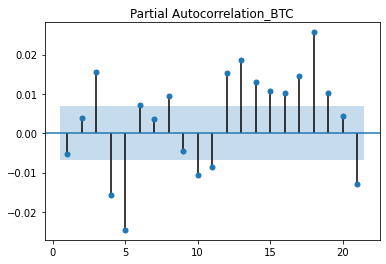

<Figure size 432x288 with 0 Axes>

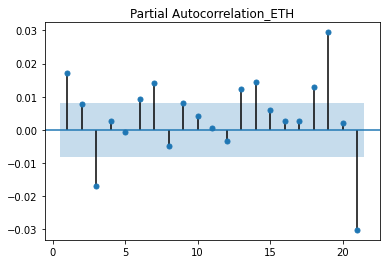

<Figure size 432x288 with 0 Axes>

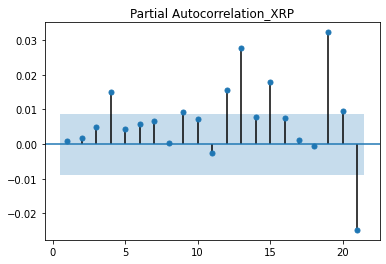

<Figure size 432x288 with 0 Axes>

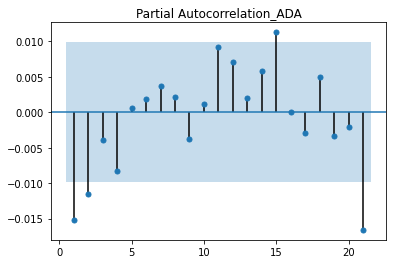

<Figure size 432x288 with 0 Axes>

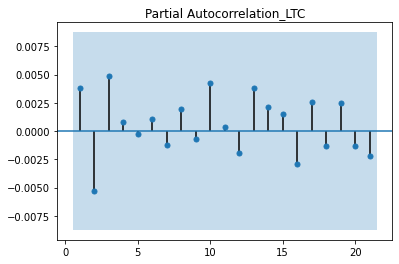

<Figure size 432x288 with 0 Axes>

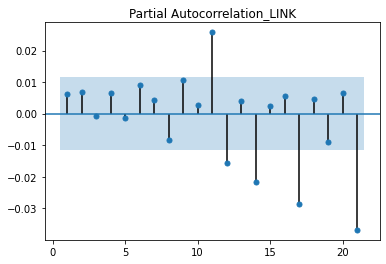

<Figure size 432x288 with 0 Axes>

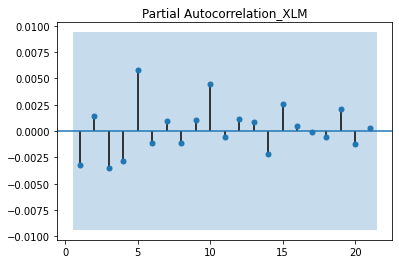

<Figure size 432x288 with 0 Axes>

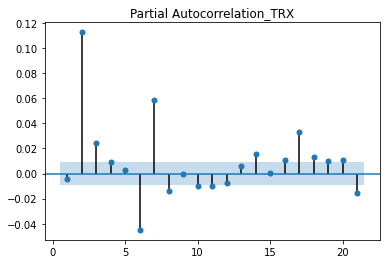

<Figure size 432x288 with 0 Axes>

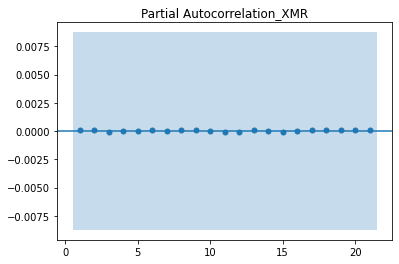

<Figure size 432x288 with 0 Axes>

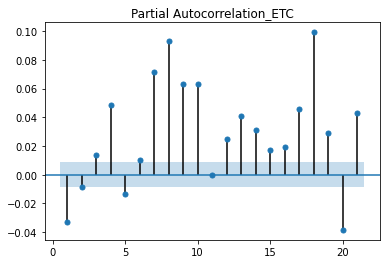

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import _prepare_data_corr_plot, _plot_corr
import statsmodels.graphics.utils as utils
from statsmodels.tsa.stattools import pacf



for crypto_ in hour['Crypto'].unique():
    
    plt.figure()
    plot_pacf_drop(hour[hour['Crypto']==crypto_]['pct_change_1hour'].dropna(), lags=24, 
                   drop_no=3, zero=False, title="Partial Autocorrelation_{}".format(crypto_))
    
plt.show()


For few cryptro cases we can see there is 2 hourly returns are more significant. One observations is the lag is increased the information coefficents are reducing which indicates that latest or close data points will help predicting returns than less recent values. On comparision the houlry returns looks less significance for the same lag window. 

# Partial Correlation Analysis for pct_change_2hour

<Figure size 432x288 with 0 Axes>

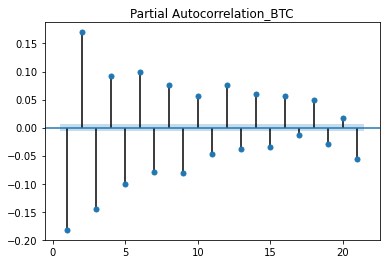

<Figure size 432x288 with 0 Axes>

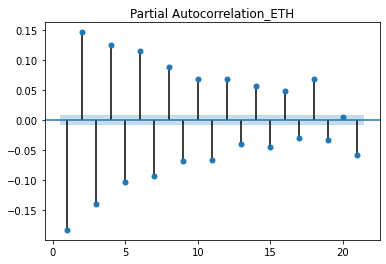

<Figure size 432x288 with 0 Axes>

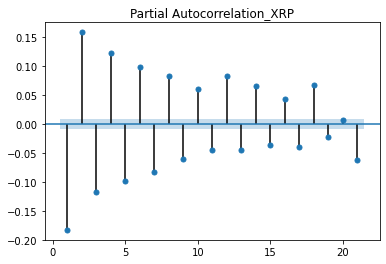

<Figure size 432x288 with 0 Axes>

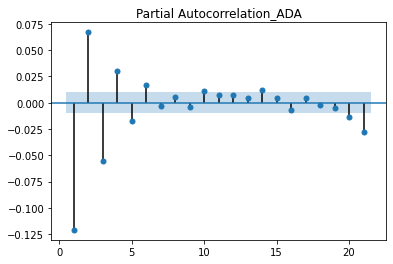

<Figure size 432x288 with 0 Axes>

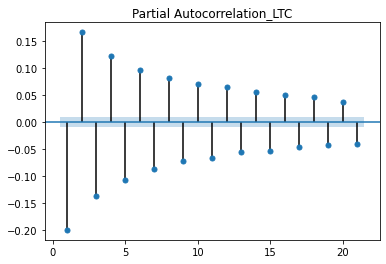

<Figure size 432x288 with 0 Axes>

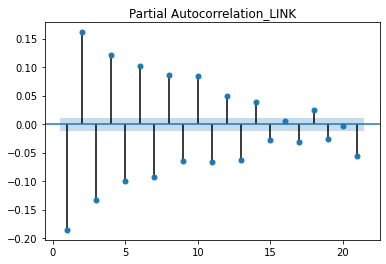

<Figure size 432x288 with 0 Axes>

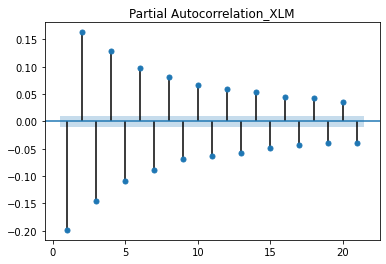

<Figure size 432x288 with 0 Axes>

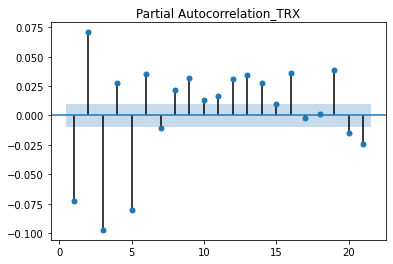

<Figure size 432x288 with 0 Axes>

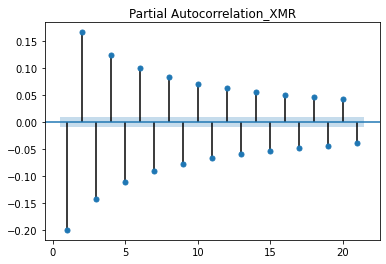

<Figure size 432x288 with 0 Axes>

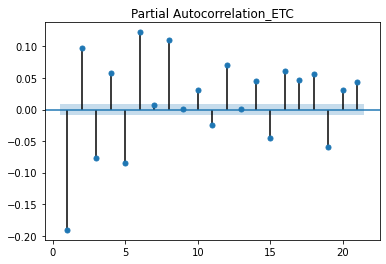

In [ ]:
from statsmodels.graphics.tsaplots import _prepare_data_corr_plot, _plot_corr
import statsmodels.graphics.utils as utils
from statsmodels.tsa.stattools import pacf



for crypto_ in hour['Crypto'].unique():
    
    plt.figure()
    plot_pacf_drop(hour[hour['Crypto']==crypto_]['pct_change_2hour'].dropna(), lags=24, 
                   drop_no=3, zero=False, title="Partial Autocorrelation_{}".format(crypto_))
    
plt.show()


# Partial Correlation Analysis for pct_change_1day

<Figure size 432x288 with 0 Axes>

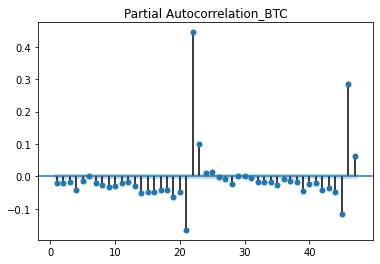

<Figure size 432x288 with 0 Axes>

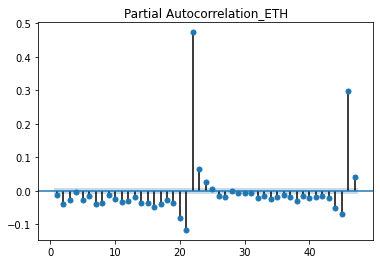

<Figure size 432x288 with 0 Axes>

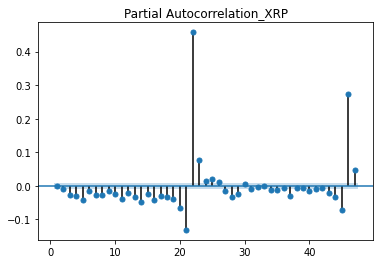

<Figure size 432x288 with 0 Axes>

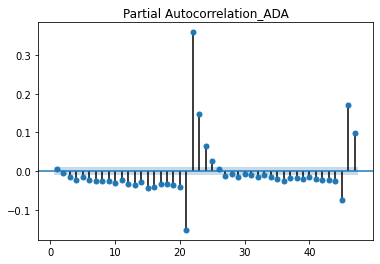

<Figure size 432x288 with 0 Axes>

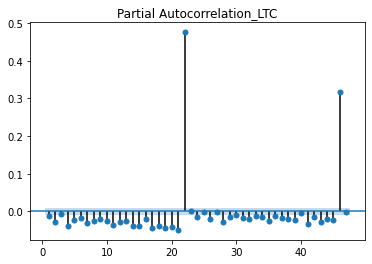

<Figure size 432x288 with 0 Axes>

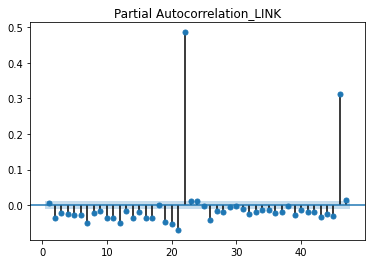

<Figure size 432x288 with 0 Axes>

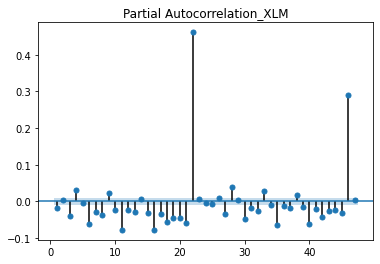

<Figure size 432x288 with 0 Axes>

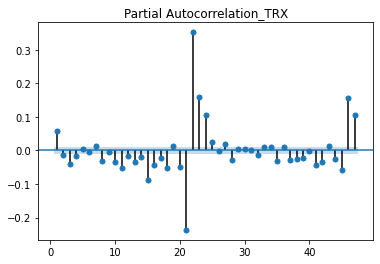

<Figure size 432x288 with 0 Axes>

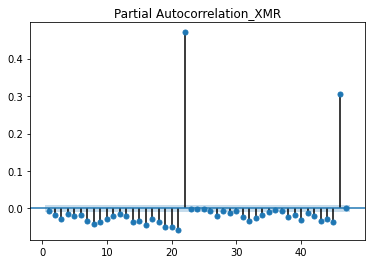

<Figure size 432x288 with 0 Axes>

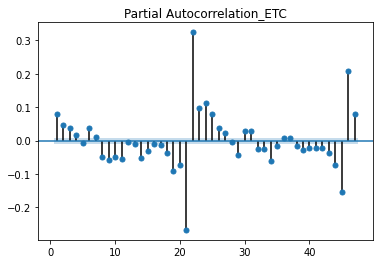

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import _prepare_data_corr_plot, _plot_corr
import statsmodels.graphics.utils as utils
from statsmodels.tsa.stattools import pacf



for crypto_ in hour['Crypto'].unique():
    
    plt.figure()
    plot_pacf_drop(hour[hour['Crypto']==crypto_]['pct_change_1day'].dropna(), lags=50, 
                   drop_no=3, zero=False, title="Partial Autocorrelation_{}".format(crypto_))
    
plt.show()


Seems like there's something between 20 and 30 and between 40 and 50 that is correlated with current state

# Seasonal Decomposition Analysis

Crypto : BTC


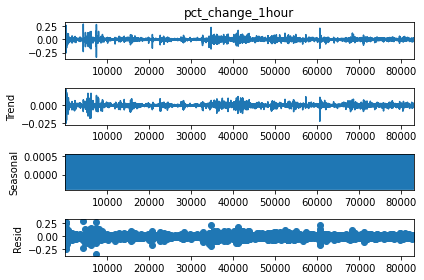

Crypto : ETH


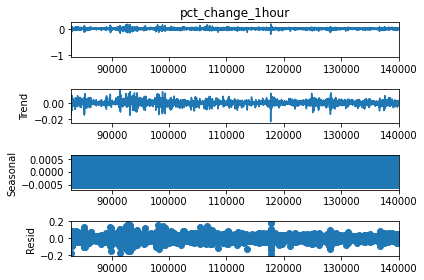

Crypto : XRP


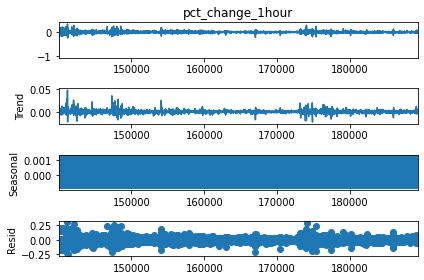

Crypto : ADA


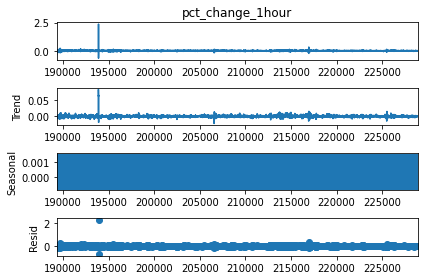

Crypto : LTC


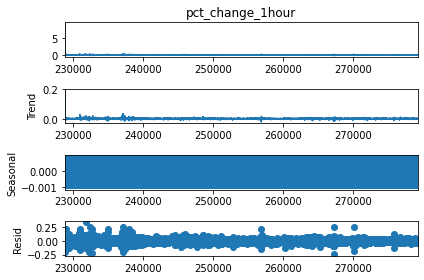

Crypto : LINK


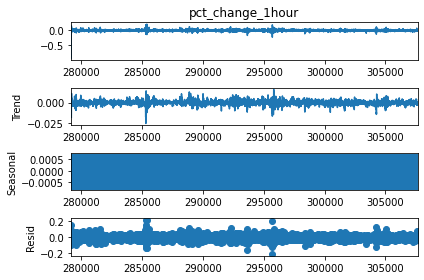

Crypto : XLM


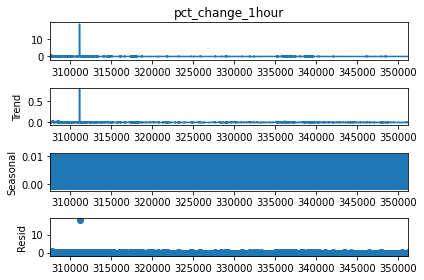

Crypto : TRX


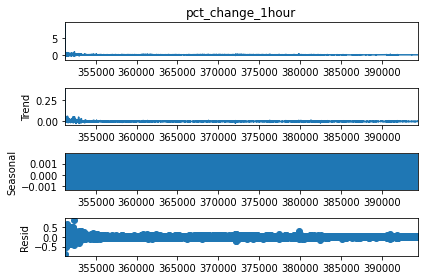

Crypto : XMR


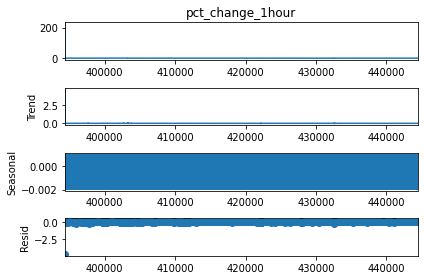

Crypto : ETC


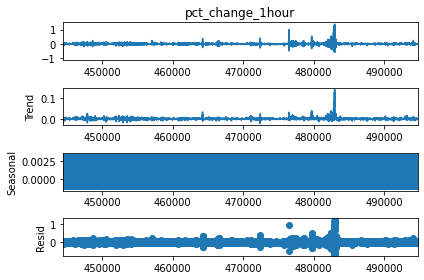

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import freq_to_period
import matplotlib.pyplot as plt
for crypto_ in hour['Crypto'].unique():
  print("Crypto : {}".format(crypto_))
  analysis = seasonal_decompose(hour[hour['Crypto']==crypto_]["pct_change_1hour"].dropna(), freq=freq_to_period('H'))
  analysis.plot()
  plt.show()

Crypto : BTC


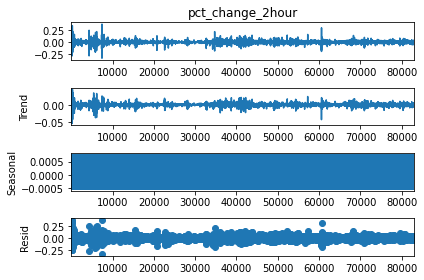

Crypto : ETH


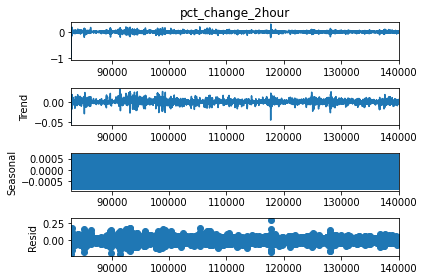

Crypto : XRP


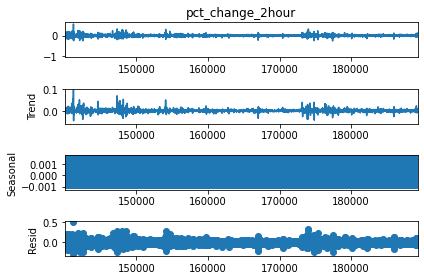

Crypto : ADA


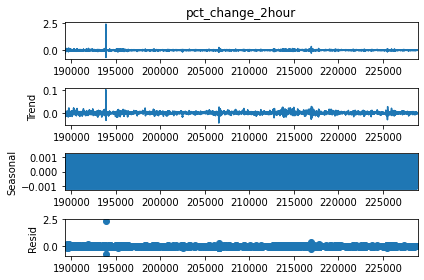

Crypto : LTC


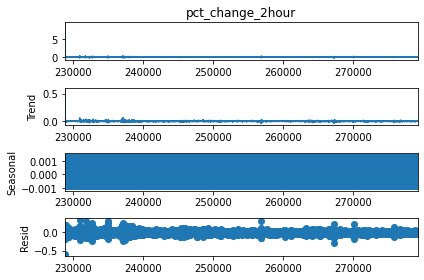

Crypto : LINK


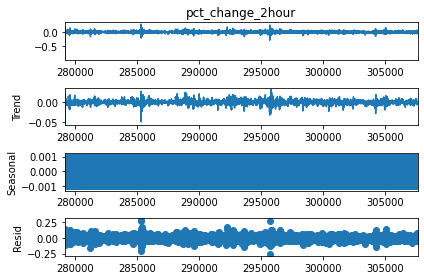

Crypto : XLM


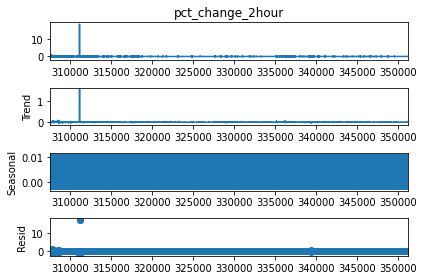

Crypto : TRX


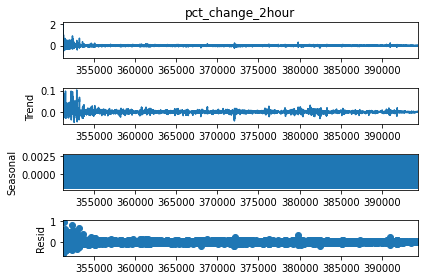

Crypto : XMR


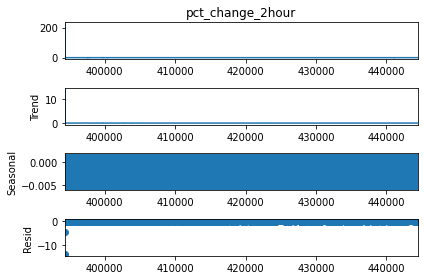

Crypto : ETC


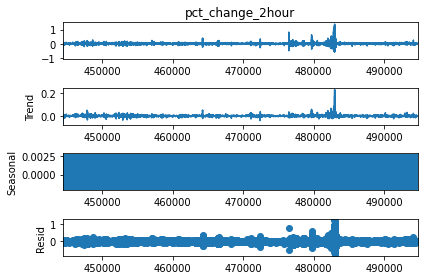

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import freq_to_period
import matplotlib.pyplot as plt
for crypto_ in hour['Crypto'].unique():
  print("Crypto : {}".format(crypto_))
  analysis = seasonal_decompose(hour[hour['Crypto']==crypto_]["pct_change_2hour"].dropna(), freq=freq_to_period('2H'))

  analysis.plot()
  plt.show()

Crypto : BTC


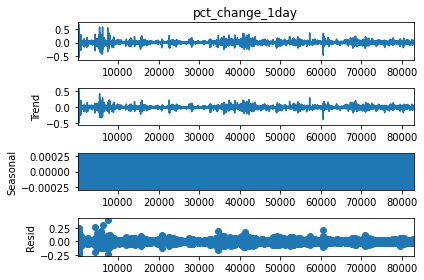

Crypto : ETH


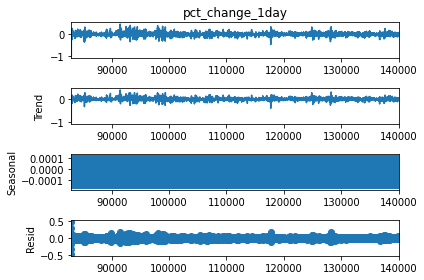

Crypto : XRP


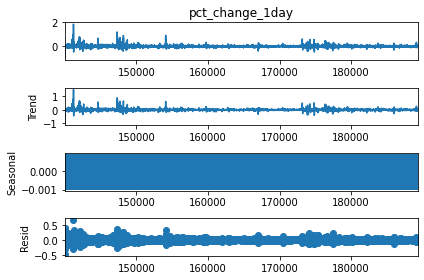

Crypto : ADA


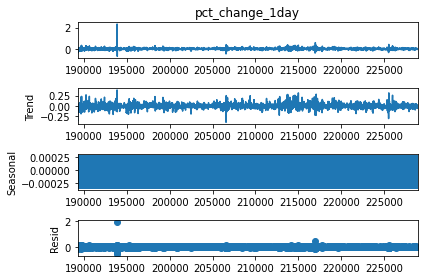

Crypto : LTC


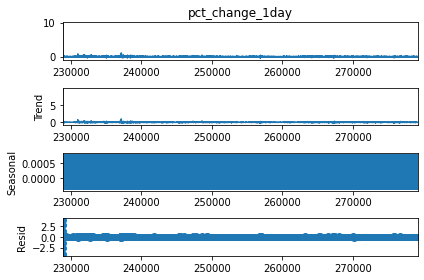

Crypto : LINK


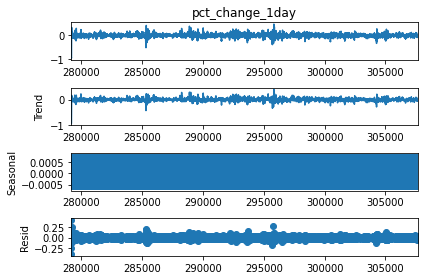

Crypto : XLM


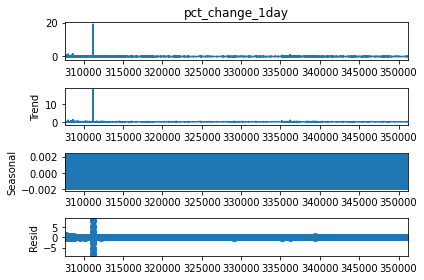

Crypto : TRX


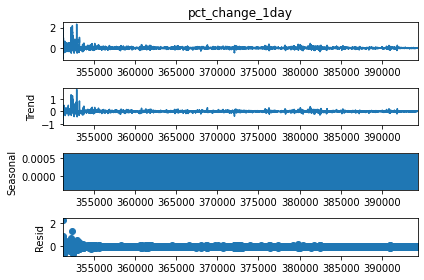

Crypto : XMR


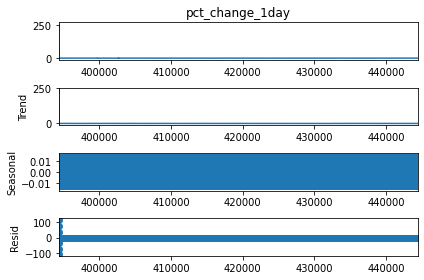

Crypto : ETC


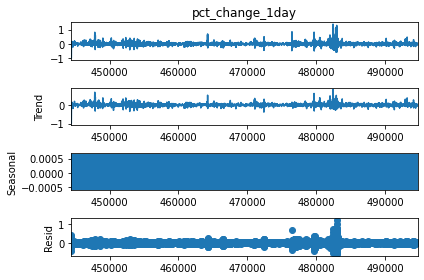

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import freq_to_period
import matplotlib.pyplot as plt
for crypto_ in hour['Crypto'].unique():
  print("Crypto : {}".format(crypto_))
  analysis = seasonal_decompose(hour[hour['Crypto']==crypto_]["pct_change_1day"].dropna(), freq=freq_to_period('D'))

  analysis.plot()
  plt.show()

Observation: In both the cases for all the cyrptos there no particular Trend and seasonality which might give us understanding that Time series models like AR n MA might not be best performing approaches.

# Questionable ADF test

In [ ]:
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


# Call the function and run the test
col = ['pct_change_1day','pct_change_2hour','pct_change_1hour']
coins = hour['Crypto'].unique()
for coin in coins:
  print('Analysis on {}'.format(coin))
  for c in col:
    print('------ result for {} ------'.format(c))
    adf_test(hour[hour['Crypto']==coin][c].dropna())

Analysis on BTC
------ result for pct_change_1day ------
Test Statistic                   -33.653034
p-value                            0.000000
#Lags Used                        65.000000
Number of Observations Used    82870.000000
Critical Value (1%)               -3.430429
Critical Value (5%)               -2.861575
Critical Value (10%)              -2.566789
dtype: float64
------ result for pct_change_2hour ------
Test Statistic                   -37.399609
p-value                            0.000000
#Lags Used                        63.000000
Number of Observations Used    82894.000000
Critical Value (1%)               -3.430429
Critical Value (5%)               -2.861575
Critical Value (10%)              -2.566789
dtype: float64
------ result for pct_change_1hour ------
Test Statistic                   -37.011265
p-value                            0.000000
#Lags Used                        65.000000
Number of Observations Used    82893.000000
Critical Value (1%)               -3.

# KPSS test

In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

col = ['pct_change_1day','pct_change_2hour','pct_change_1hour']
coins = hour['Crypto'].unique()
for coin in coins:
  print('Analysis on {}'.format(coin))
  for c in col:
    print('------ result for {} ------'.format(c))
    kpss_test(hour[hour['Crypto']==coin][c].dropna())

Analysis on BTC
------ result for pct_change_1day ------
Results of KPSS Test:
Test Statistic             0.257743
p-value                    0.100000
#Lags Used               155.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
------ result for pct_change_2hour ------
Results of KPSS Test:
Test Statistic            0.302831
p-value                   0.100000
#Lags Used               13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------ result for pct_change_1hour ------
Results of KPSS Test:
Test Statistic            0.362251
p-value                   0.093426
#Lags Used               52.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Analys

We have conducted ADF and KPSS tests to understand the stationarity of the sequence. From ADF tets it proved that none of the crypto sequence are have stationarity while KPSS provided that for few crypto(close to 4) the series is stationary.

Finally after the analysis performed we understood that Time series models like ARMA , ARIMA etc might be suitable for this dataset and regualr classificcation can be used

After trying some models we realized it is hard to do hyperparameter tuning on models built with hourly data, so we decided to use daily data.

# THIS IS WHAT WE GO FOR: 1 day returns for all coins

In [ ]:
folder_path = '/content/drive/MyDrive/MADS_23_DL_final_project'
df = pd.read_csv(folder_path + '/data/crypto_data_daily_cleaned_v1.csv')

In [ ]:
def calculate_pct_change(df):
  coins = df.Crypto.unique()
  df_pct_change = pd.DataFrame()
  for coin in coins:
    x = df[df['Crypto']==coin]
    x['pct_change_1day'] = x['Close'].pct_change(1)
    df_pct_change = pd.concat([df_pct_change,x])
  return df_pct_change

In [ ]:
df = calculate_pct_change(df)

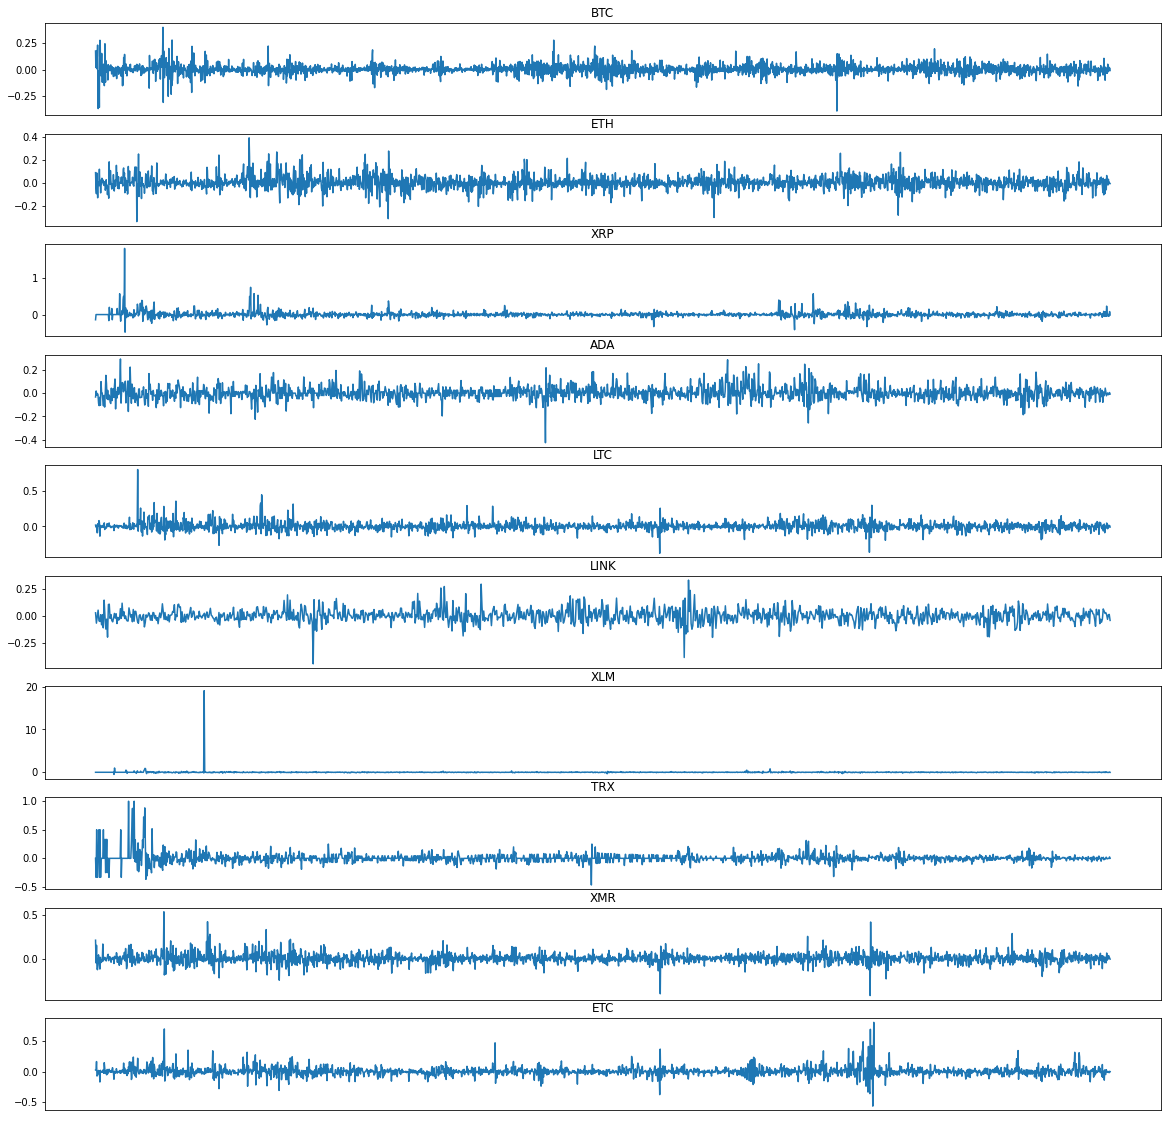

In [ ]:
#Plotting 1 day returns for all coins

coins = df['Crypto'].unique()

f,ax = plt.subplots(len(coins),figsize=(20,20))
for i in range(len(coins)):
  
  ax[i].plot(df.index[df['Crypto']==coins[i]],df.pct_change_1day[df['Crypto']==coins[i]])
  ax[i].title.set_text(coins[i])
  ax[i].set_xticks([])
  

## Calculating the Market Cap


The basic analysis is to build a Market capital column and extarct the weightage based on the volumn traded.

In [ ]:
# calculate value of each cryto at certain time points 
df['Value'] = df['Close']*df['Volume']

# the sum of values at each time point
sum_at_timepoints = df.groupby('Open Time').sum()['Value']


# merge and calculate their weights over the sum at that time
merged_daily = df.merge(sum_at_timepoints, how='left',
                           on='Open Time', suffixes=('_vol', '_vol_sum'))
merged_daily['Weight'] = merged_daily['Value_vol']/merged_daily['Value_vol_sum']

In [ ]:
merged_daily.head(2).T

,0,1
Open Time,2013-04-01,2013-04-02
Open,93.155,104.72
High,105.9,127.0
Low,93.155,99.0
Close,104.75,123.016
Volume,11008.524,24187.398
train_test,Train,Train
Crypto,BTC,BTC
pct_change_1day,NaN,0.174377
Value_vol,1153142.889,2975436.952368


## Calculate weighted pct change

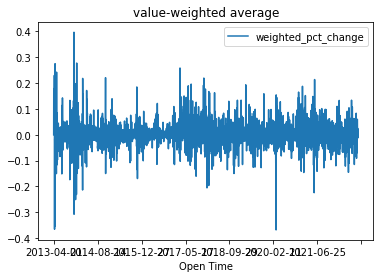

In [ ]:
# calculate weighted pct change
merged_daily['weighted_pct_change'] = merged_daily['pct_change_1day']*merged_daily['Weight']

# plot value weighted average over time
time_group2 = merged_daily.groupby('Open Time').sum()
time_group2.plot(y='weighted_pct_change',kind='line',title='value-weighted average')

In [ ]:
# adding the weighted_pct_change to the final dataframe
daily_v2 = merged_daily.merge(time_group2[['weighted_pct_change']], how='left',
                           on='Open Time' )

In [ ]:
daily_v2.head(2)

,Open Time,Open,High,Low,Close,Volume,train_test,Crypto,pct_change_1day,Value_vol,Value_vol_sum,Weight,weighted_pct_change_x,weighted_pct_change_y
0,2013-04-01,93.155,105.9,93.155,104.750,11008.524,Train,BTC,NaN,1.153143e+06,1.153143e+06,1.0,NaN,0.000000
1,2013-04-02,104.720,127.0,99.000,123.016,24187.398,Train,BTC,0.174377,2.975437e+06,2.975437e+06,1.0,0.174377,0.174377


## Correlation between the coins - based closed value

Trying to understand how Crytos are inter dependant on each other.


In [ ]:
#unstacking the coins to understand the correlation between the coins
wide_format = df.groupby(['Open Time', 'Crypto'])['Close'].last().unstack()

In [ ]:
wide_format

Crypto,ADA,BTC,ETC,ETH,LINK,LTC,TRX,XLM,XMR,XRP
Open Time,,,,,,,,,,
2013-04-01,NaN,104.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-02,NaN,123.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-03,NaN,125.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-04,NaN,135.632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,NaN,142.990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,0.44710,19228.000,28.46,1336.54000,7.943,53.45,0.05961,0.11374,146.02,0.46791
2022-09-27,0.44120,19077.570,28.13,1327.92000,7.700,NaN,NaN,NaN,NaN,NaN
2022-09-28,0.43606,19400.000,27.63,1337.30000,7.790,53.28,0.05958,0.10814,147.23,0.44890


Observation: From the data we can clearly see the BTC coin has data from 2013 where as the remaining coins has data from 2016/17.

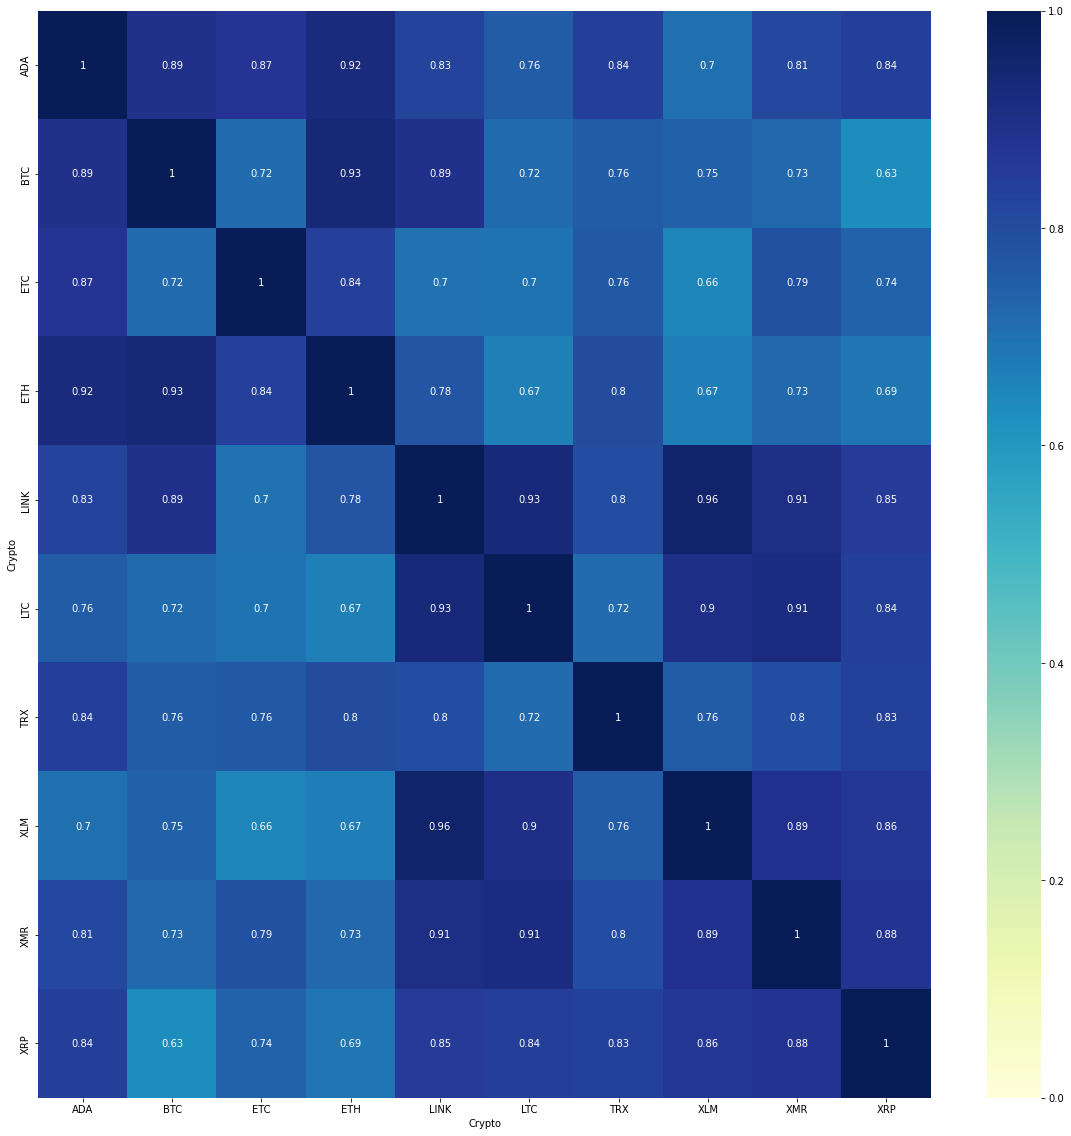

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(wide_format.corr(),vmin=0, vmax=1, annot=True, cmap="YlGnBu");

Observation: Most of the blocks are more blueish which is sign that they are highlight correlated with each others.  

In [ ]:
# Code to print the top coins which are correlate with others 
corr_matrix = wide_format.corr()
corr_matrix['BTC'].sort_values(ascending=False)

Crypto
BTC     1.000000
ETH     0.934804
LINK    0.893931
ADA     0.891974
TRX     0.756979
XLM     0.745775
XMR     0.725461
LTC     0.722621
ETC     0.715224
XRP     0.634110
Name: BTC, dtype: float64

## Closing values comparision amoung the Coins

In [ ]:
wide_format = wide_format.reset_index()

In [ ]:
fig = px.line(wide_format, y=wide_format.columns, x = 'Open Time')

# Show plot 
fig.show()

<Figure size 432x288 with 0 Axes>

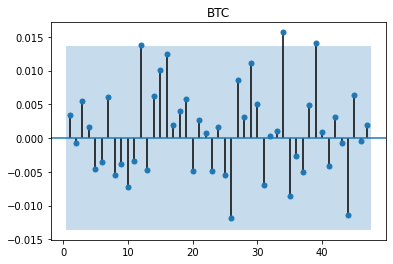

<Figure size 432x288 with 0 Axes>

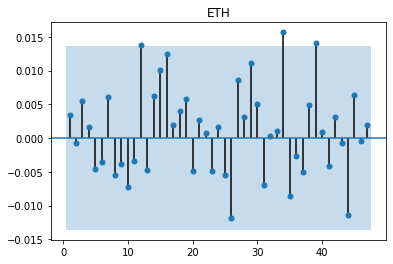

<Figure size 432x288 with 0 Axes>

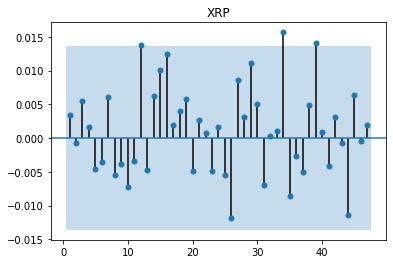

<Figure size 432x288 with 0 Axes>

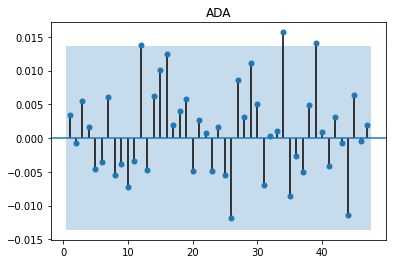

<Figure size 432x288 with 0 Axes>

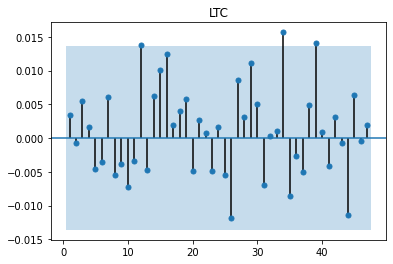

<Figure size 432x288 with 0 Axes>

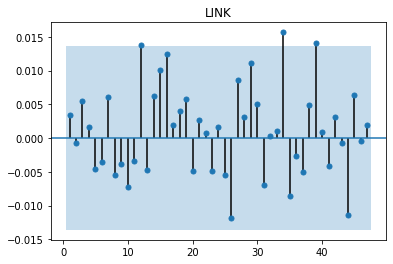

<Figure size 432x288 with 0 Axes>

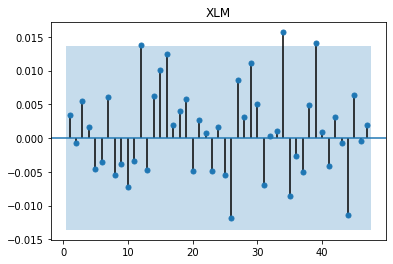

<Figure size 432x288 with 0 Axes>

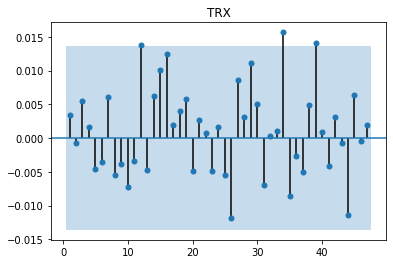

<Figure size 432x288 with 0 Axes>

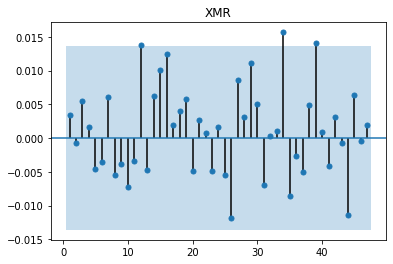

<Figure size 432x288 with 0 Axes>

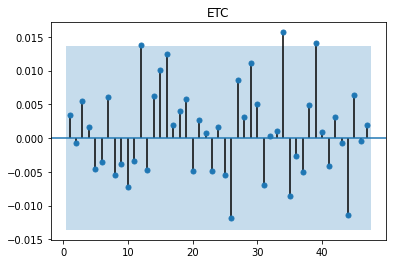

In [ ]:

col = 'pct_change_1day'

coins = daily_v2['Crypto'].unique()
for coin in coins:
    plt.figure()
    plot_pacf_drop(daily_v2[col].dropna(), lags=50, drop_no=3, zero=False,title=coin)
    
plt.show()


The plots are not so informative in this case

## Defining the Target Variable

We want to follow the classification approach and hence based on the "pct_change_2hour" we are creating 2 classes one class '0' when the returns are negative and '1' When the retruns are postive.

In [ ]:
def create_target(df):
  market_RoR = 26.89
  market_RoR_1d = market_RoR/365
  df['Target'] = np.where(df['pct_change_1day']>0, 1,0)
  df['Target'] = np.where(df['pct_change_1day']>market_RoR_1d, 2,1)
  df['Target'][df['Target']==1] = np.where(df['pct_change_1day'][df['Target']==1]>=0, 1,0)
  return df

In [ ]:
daily_v2 = create_target(daily_v2)

In [ ]:
daily_v2['Target'].value_counts(normalize=True)

0    0.465005
1    0.452135
2    0.082859
Name: Target, dtype: float64

In [ ]:
daily_v2.drop(['pct_change_1day'], axis=1, inplace=True) # droppping the column as we already extracted the target

In [ ]:
daily_v2.shape

(20746, 15)

## Crypto vs Yearly returns

In [ ]:
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), width=800))
daily_v2['Open Time'] = pd.to_datetime(df['Open Time'])
daily_v2['Year'] = daily_v2['Open Time'].dt.year
last_5_years =  [2018, 2019, 2020, 2021, 2022]

years = {year: pd.DataFrame() for year in last_5_years[::-1]}
for key in years.keys():
    temp_df=daily_v2[daily_v2.Year == key]
    years[key] = temp_df.groupby('Crypto')['Target'].mean().rename("Avg_return_{}".format(key))
temp_df_v2=pd.concat((years[i].to_frame() for i in years.keys()), axis=1)
temp_df_v2=temp_df_v2.sort_values(by="Avg_return_2021")


In [ ]:
fig = make_subplots(rows=1, cols=len(df.columns), shared_yaxes=True)
for i, col in enumerate(temp_df_v2.columns):
    x = temp_df_v2[col]
    mask = x<=0
    fig.add_trace(go.Bar(x=x[mask], y=temp_df_v2.index[mask],orientation='h', 
                         text=x[mask], texttemplate='%{text:.2f}%',textposition='auto',
                         hovertemplate='Average Return in %{y} Coins = %{x:.4f}%',
                         marker=dict(color='red', opacity=0.7),name=col[-4:]), 
                  row=1, col=i+1)
    fig.add_trace(go.Bar(x=x[~mask], y=temp_df_v2.index[~mask],orientation='h', 
                         text=x[~mask], texttemplate='%{text:.2f}%', textposition='auto', 
                         hovertemplate='Average Return in %{y} Coins = %{x:.4f}%',
                         marker=dict(color='green', opacity=0.7),name=col[-4:]), 
                  row=1, col=i+1)
    fig.update_xaxes(range=(x.min()-.15,x.max()+.15), title='{}'.format(col[-4:]), 
                     showticklabels=False, row=1, col=i+1)
fig.update_layout(template=temp,title='Yearly Average Returns by Coin', 
                  hovermode='closest',margin=dict(l=250,r=50),
                  height=600, width=1000, showlegend=False)
fig.show()

## End of the notebook